<a href="https://colab.research.google.com/github/Ismail-Armutcu/Algorithms-for-Interactive-Sytems/blob/main/MMI513_PA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4: Procedural Generation**

Procedural Content Generation (PCG) refers to the creation of content, such as terrain, mazes, trees, and universes, through the use of algorithms and code rather than manual creation. In this notebook, we will explore different PCG methods

## Terrain Generation:
Terrain generation involves creating realistic landscapes such as mountains, hills, and valleys. In this notebook, we will cover different methods to generate natural-looking heightmaps.

## Maze Generation:
Maze generation is the creation of a labyrinthine puzzle through an algorithmic process. In this notebook, we will explore different algorithms to generate a maze, including depth-first search, and Kruskal's method. Prim's method is left as the programming assignment.

## L-Systems:
L-Systems are a type of formal grammar used to model the growth of plants and trees. In this notebook, we will use L-Systems to generate trees by creating a set of rules that determine how the branches and leaves are generated.

# Universe Generation:
Universe generation involves creating a simulation of a fictional universe. In this notebook, we will simulate a universe by creating stars and planets.

- Preamble is where we import the Python modules that we will use

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

plt.rcParams['figure.figsize'] = [7.5, 7.5] # This is to adjust the image size on Jupyter

In [16]:
  def undirectedconnectiongraph(xnum=30, ynum=30):
    G = {'V':[], 'E':[]} # We will use a dictionary for simplicity
    for xind in range(xnum):
      for yind in range(ynum):
        G['V'].append((xind, yind))

    # Traverse north first
    for pt in G['V']:
      vtn = north(pt[0], pt[1])
      if isvertex(vtn, G['V']):
        G['E'].append((pt, vtn))

    # Traverse east second
    for pt in G['V']:
      vte = east(pt[0], pt[1])
      if isvertex(vte, G['V']):
        G['E'].append((pt, vte))
    return G

  def north(xind, yind):
    node = (xind, yind + 1)
    return node

  def south(xind, yind):
    node = (xind, yind - 1)
    return node

  def east(xind, yind):
    node = (xind + 1, yind)
    return node

  def west(xind, yind):
    node = (xind - 1, yind)
    return node

  def isvertex(node, vertices):
    return node in vertices

  def plotgraph(G, vertexflag=True):
    for e in G['E']:
      vec = np.array([e[1][0]-e[0][0], e[1][1]-e[0][1]])
      ort = np.array([-vec[1], vec[0]])
      olen = np.linalg.norm(ort)
      ort = ort / olen
      sum = np.array([(e[1][0]+e[0][0])/2, (e[1][1]+e[0][1])/2])
      startp = sum - ort / 2
      endp = sum + ort / 2
      plt.plot((startp[0], endp[0]), (startp[1], endp[1]), 'k', linewidth=10)
      if vertexflag:
        for v in G['V']:
          plt.plot(float(v[0]), float(v[1]), 'ro')
    plt.axis('square')
    plt.show()

  def neighbourhood(node, vertices):
    pneighbours = [north(node[0], node[1]), south(node[0], node[1]), east(node[0], node[1]), west(node[0], node[1])]
    neighbours = []
    for ind in range(len(pneighbours)):
      n = pneighbours[ind]
      if(isvertex(n, vertices) == True):
        neighbours.append(n)
    return set(neighbours)

  def randomnode(vertices):
    vertices = list(vertices)
    randind = np.random.randint(0, len(vertices))
    return vertices[randind]

  def subsetinset(query, settosearch): # Used also in Kruskal's method
    subset = set()
    for element in settosearch:
        if len(query.difference(element))==0:
          subset = subset.union(set(element))
    return frozenset(subset)

  def frozenunion(S1, S2):
    Sunion = set()
    for element in S1:
      Sunion = Sunion.union(set([element]))
    for element in S2:
      Sunion = Sunion.union(set([element]))
    return frozenset(Sunion)

## **Testing Code** ✅

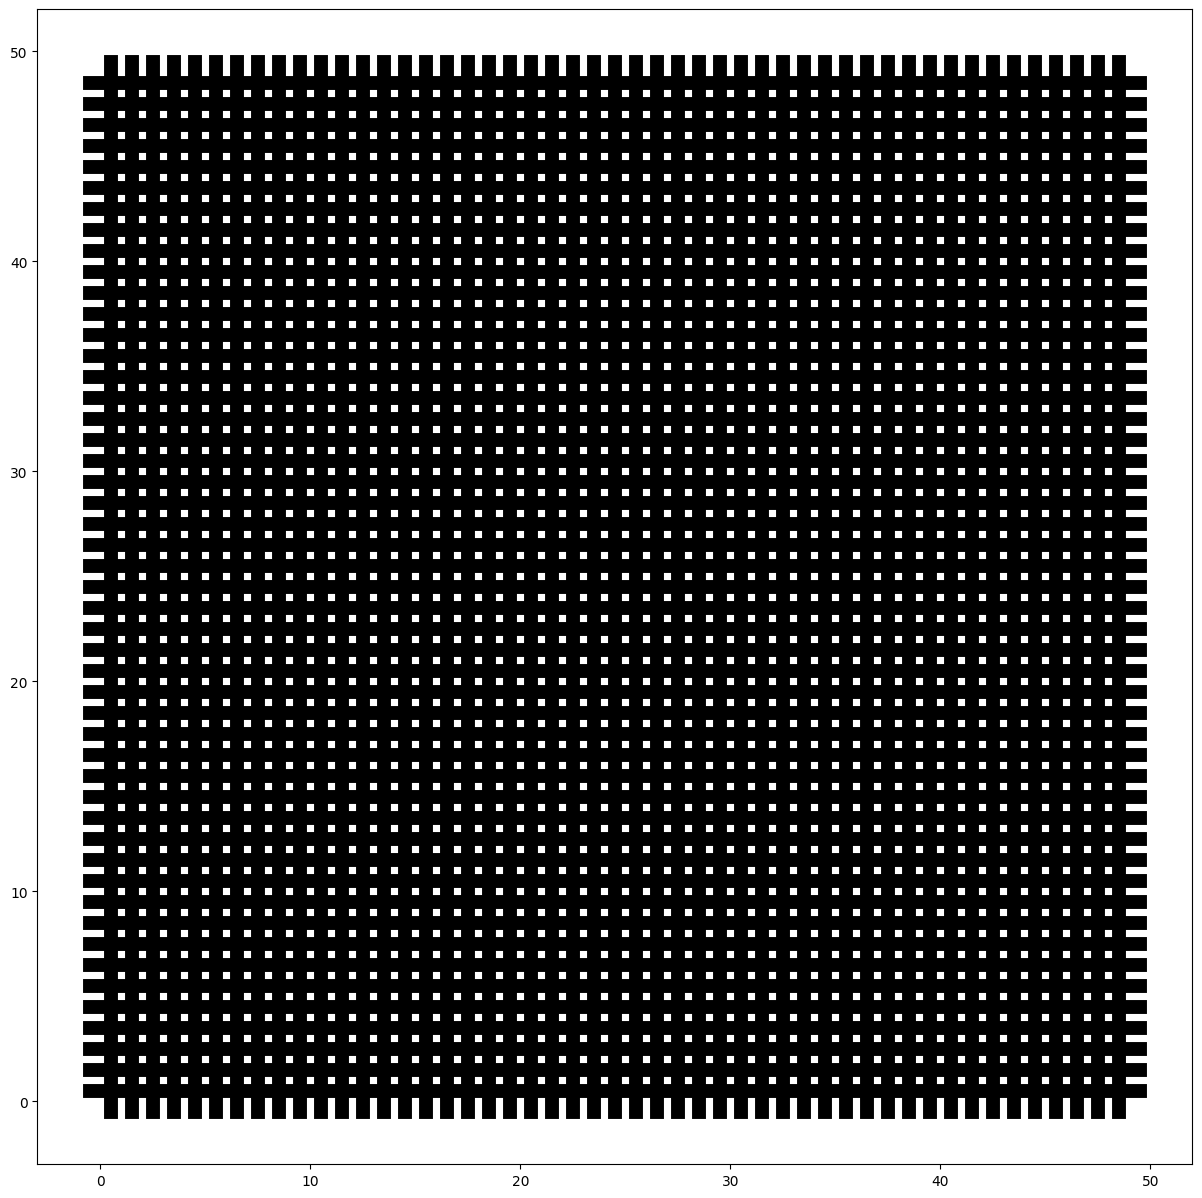

In [27]:
G = undirectedconnectiongraph(50, 50)
plotgraph(G, False)

In [18]:
def depthfirstmaze(G):
  vertices = G['V'].copy()
  C = set(G['V'].copy()) # Unvisited cells
  W = set(G['E'].copy()) # Walls
  S = [] # We will use a list as a substitute for a stack
  c = randomnode(C) # We will visit this node first
  C.remove(c) # Remove visited
  flag = True
  while flag:
    neigset = neighbourhood(c, vertices) # Find all neighbours
    N = neigset.intersection(C) # Select only the (as yet) unvisited neighbours
    if len(N)==0: # All neighbours already visited, select another starting point
      if len(S) >= 1:
        c = S.pop()
    else:
      n = randomnode(N)

      try: # We are using sets that are not ordered.
        W.remove((c,n))
      except:
        W.remove((n,c))

      S.append(c) # Add c to stack storing already visited cells
      c = n
      C.remove(n)
    flag = (len(C) > 0)

  M = dict()
  M['V'] = G['V'].copy()
  M['E'] = list(W)
  return M

## **Testing Code** ✅

In [19]:
#M = depthfirstmaze(G)
#plt.title('Depth-first maze')
#plt.rcParams['figure.figsize'] = [15, 15] # This is to adjust the image size on Jupyter
#plotgraph(M, False)

## Kruskal Maze

- Kruskal maze provides a slightly different maze structure. Notice the differences in the maze pattern.
- The way it is generated is also different.

In [20]:
def kruskalmaze(G):
  vertices = G['V'].copy()
  W = set(G['E'].copy())
  M = set()

  for node in vertices: # Initially all cells are isolated
    M.add(frozenset([node])) # Set of sets Read about mutability in Python!

  for wall in W.copy(): # Set size over the iterator cannot change during the iteration!

    c1 = frozenset([wall[0]])
    c2 = frozenset([wall[1]])
    S1 = subsetinset(c1, M)
    S2 = subsetinset(c2, M)
    if (S1 != S2):
      W.remove(wall)
      M.remove(S1)
      M.remove(S2)
      Sunion = frozenunion(S1, S2)
      M.add(Sunion)
  M = dict()
  M['V'] = G['V'].copy()
  M['E'] = list(W)
  return M

## **Testing Code** ✅

In [21]:
#M = kruskalmaze(G)
#plt.title('Kruskal maze')
#plt.rcParams['figure.figsize'] = [15, 15] # This is to adjust the image size on Jupyter
#plotgraph(M, False)

## Prims Maze

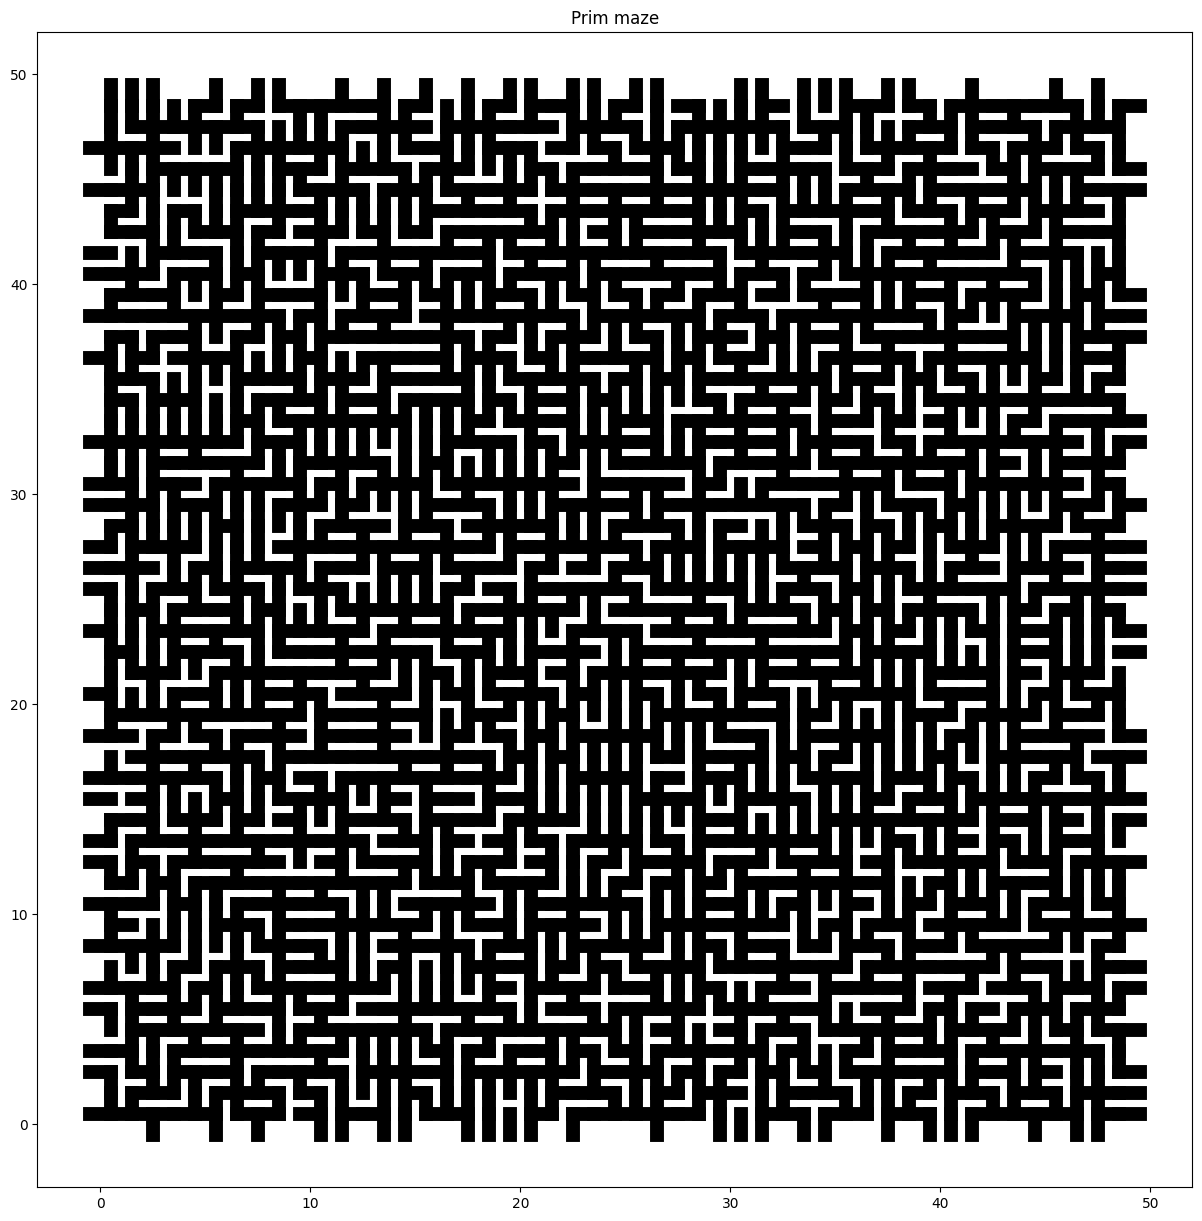

In [29]:


def inSet(element,Set):
  for s in Set:
    if(element == s):
      return True
  return False

def intersectionSize(set1,set2):
  count = 0
  for s1 in set1:
    for s2 in set2:
      if(s1 == s2):
        count = count +1
  return count

def func(l, C):
  count = 0
  if(inSet(l[0],C)):
    count +=1
  if(inSet(l[1],C)):
    count +=1
  return count


def pimmsmaze(G):
  W = set(G['E'].copy())
  V = set(G['V'].copy())
  L = set()
  C = set()
  c = randomnode(V)
  for w in W:
    if(inSet(c,w)):
      L.add(w)

  while len(L):
    l = randomnode(L)
    if(func(l,C) <=1):
      C.add(l[0])
      C.add(l[1])
      W.remove(l)
      for w in W:
        if(intersectionSize(w[0],l[0]) > 0 and intersectionSize(w[1],l[1]) > 0):
          if(inSet(w,L) != True):
            L.add(w)
    L.remove(l)

  M = dict()
  M['V'] = G['V'].copy()
  M['E'] = list(W)
  return M

L = pimmsmaze(G)


plt.title('Prim maze')
plt.rcParams['figure.figsize'] = [15, 15] # This is to adjust the image size on Jupyter
plotgraph(L, False)


# Programming Assignment #3

## **Fall 2023/24 Semester**

- Implement Randomized Prim maze using the undirected connection graph **on this notebook**.
_ You can use the pseudocode in the textbook (p. 94 of 2017 ed.)

**!!! IMPORTANT !!!**: If your implementation does not use the `undirectedconnectiongraph` and `plotgraph` functions in this notebook your grade for this assignment will be zero.

**GRADING:**

1. `pimmsmaze()` function works with default arguments (60/100)
2. Code carries out necessary checks on inputs via proper assertions (20/100)
3. Code is properly commented, explained and documented (20/100)

**Notes:**
1. You are free to use chatGPT for help. However, you should not use code generated by chatGPT directly and you should mention which part of the code is chatGPT in the comments. Your code will be checked for verbatim copying from chatGPT.
2. You are not allowed to use external modules/libraries in your implementations except those already in the notebook, but you can use them for testing your code.
3. You will upload your submission as a Python notebook to ODTUClass.

(c) Huseyin Hacihabiboglu, 2022-2023